In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# reading the csv file into a pandas DataFrame
red = pd.read_csv(url_red, sep=";")
white = pd.read_csv(url_white, sep=";")

# adding a new column so that when we combine datasets we can tell which wine each row referes to
red["color"] = "red"
white["color"] = "white"

# concatenates (stacks) DataFrames together
wine = pd.concat([red, white], axis = 0) # axis = 0 stacks them row-wise, on top of each other
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
# checking for null values
wine.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# checking for missing values
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
# looking for any inconsistent data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


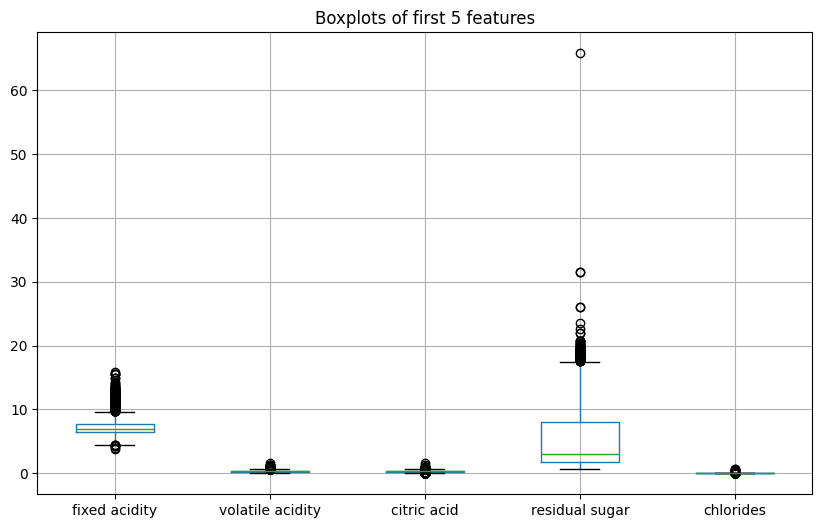

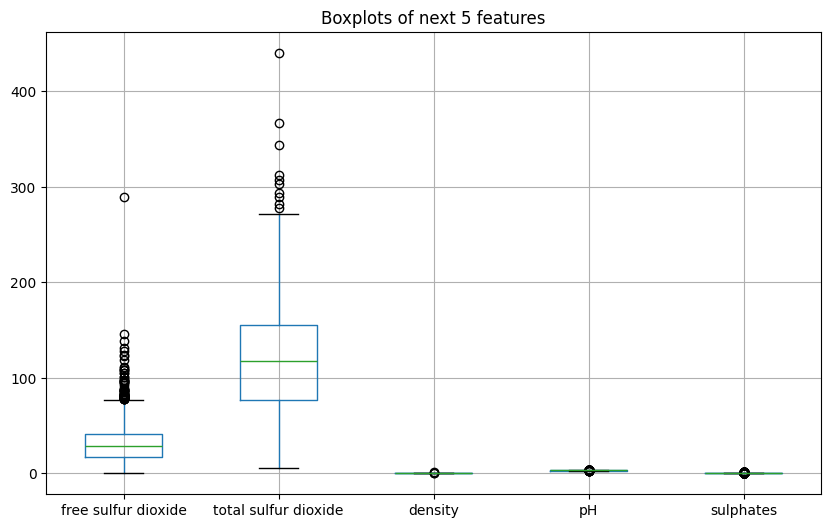

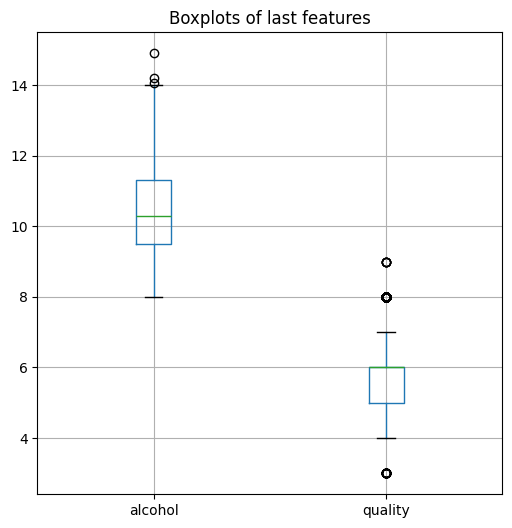

In [ ]:
# creating plots to visualize the distributions to spot outliers more clearly
wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides']].boxplot(figsize=(10,6))
plt.title("Boxplots of first 5 features")
plt.show()

# next 5 features
wine[['free sulfur dioxide','total sulfur dioxide','density','pH','sulphates']].boxplot(figsize=(10,6))
plt.title("Boxplots of next 5 features")
plt.show()

# last features (alcohol + quality)
wine[['alcohol','quality']].boxplot(figsize=(6,6))
plt.title("Boxplots of last features")
plt.show()


In [ ]:
# converting color from categorical to numerical
wine["color"] = wine["color"].map({"red": 0, "white": 1})

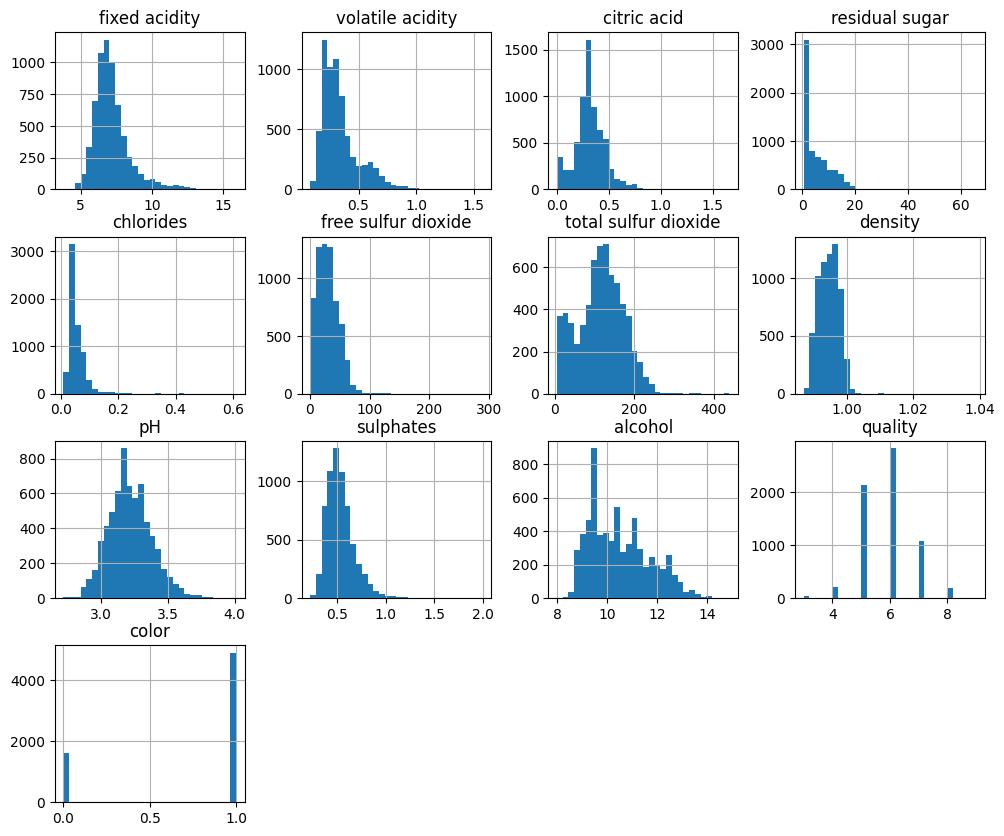

In [ ]:
# checking if the attributes are normally distributed

# visually
wine.hist(bins=30, figsize=(12,10))
plt.show()


In [ ]:
# numeric
wine.skew()

,0
fixed acidity,1.723290
volatile acidity,1.495097
citric acid,0.471731
residual sugar,1.435404
chlorides,5.399828
free sulfur dioxide,1.220066
total sulfur dioxide,-0.001177
density,0.503602
pH,0.386839
sulphates,1.797270


In [ ]:
# scaling by standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = wine['quality']  # target
X = wine.drop('quality', axis=1)  # features only

X_scaled = scaler.fit_transform(X)

# converting back to DataFrame for easier interpretation
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.describe())


       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
mean   -3.849639e-16      1.049902e-16  2.187295e-17    3.499672e-17   
std     1.000077e+00      1.000077e+00  1.000077e+00    1.000077e+00   
min    -2.634589e+00     -1.577330e+00 -2.192833e+00   -1.018034e+00   
25%    -6.289329e-01     -6.661613e-01 -4.723335e-01   -7.657978e-01   
50%    -1.660892e-01     -3.016939e-01 -5.941375e-02   -5.135612e-01   
75%     3.738951e-01      3.664962e-01  4.911459e-01    5.584445e-01   
max     6.699425e+00      7.534354e+00  9.231281e+00    1.268682e+01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.497000e+03         6.497000e+03          6.497000e+03  6.497000e+03   
mean   1.749836e-17        -8.749179e-17         -6.999344e-17 -3.552167e-15   
std    1.000077e+00         1.000077e+00          1.000077e+00  1.000077e+00   
min   -1.342639e+00        -1.6

In [ ]:
# normalization (min-max scaling to [0,1])
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_normalized = minmax.fit_transform(X)

X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.753886
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

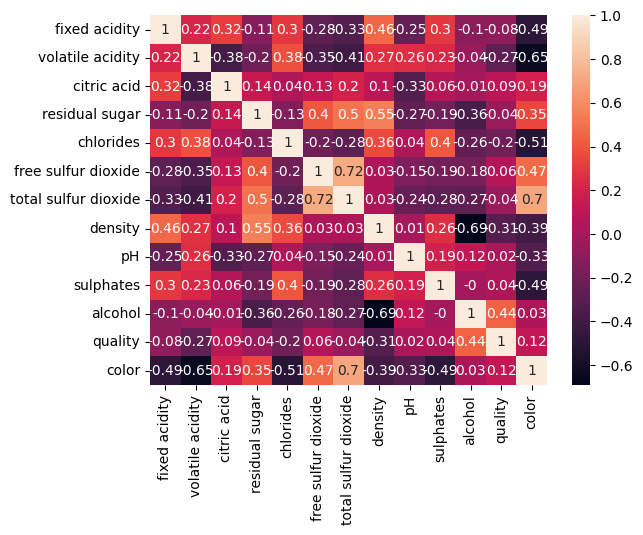

In [ ]:
# finding how the attributes are corrilated to one another as well as the target variable using a heatmap
# visual analysis
correlation_matrix = wine.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


In [ ]:
# numerical analysis
wine.corr()['quality'].sort_values(ascending=False)


,quality
quality,1.000000
alcohol,0.444319
color,0.119323
citric acid,0.085532
free sulfur dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual sugar,-0.036980
total sulfur dioxide,-0.041385
fixed acidity,-0.076743


In [ ]:
# chosing the top 3 variables that are closely related to the target varaible quality
features = ['alcohol', 'volatile acidity', 'density']

X = X_scaled[features]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# making sure the data was split 80/20
X_train.shape, X_test.shape


((5197, 3), (1300, 3))

In [ ]:
# now we create a model using SGDRegressor method of scikit-learn library
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)

SGDRegressor()

In [ ]:
sgd.coef_

array([ 0.4621349 , -0.25223613,  0.12845655])

In [ ]:
sgd.intercept_

array([5.8299909])

In [ ]:
sgd.score(X_test, y_test) # this is R^2

0.25268789265811065

it shows the model explains around 25% variance in the wine quality. Not super strong, but expected since wine quality has a lot of subjective factors not captures by chemistry alone.

In [ ]:
# predictions and error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse, mae, ev, r2

(0.5519249247965297,
 0.5767900734506153,
 0.2527239303636698,
 0.25268789265811065)

In [ ]:
# starting with just one parameter: loss
sgd_huber = SGDRegressor(loss="huber", max_iter=2000, random_state=42)
sgd_huber.fit(X_train, y_train)

y_pred_huber = sgd_huber.predict(X_test)

mse_huber = mean_squared_error(y_test, y_pred_huber)
mae_huber = mean_absolute_error(y_test, y_pred_huber)
r2_huber = r2_score(y_test, y_pred_huber)

mse_huber, mae_huber, r2_huber


(0.5707417924150152, 0.5895649513563481, 0.22720965755443623)

Using huber actually made the model worse for this dataset.

In [ ]:
# trying penalty= l1
sgd_l1 = SGDRegressor(penalty="l1", max_iter=2000, random_state=42)
sgd_l1.fit(X_train, y_train)

y_pred_l1 = sgd_l1.predict(X_test)

mse_l1 = mean_squared_error(y_test, y_pred_l1)
mae_l1 = mean_absolute_error(y_test, y_pred_l1)
r2_l1 = r2_score(y_test, y_pred_l1)

mse_l1, mae_l1, r2_l1


(0.5531388079083742, 0.5769303659527532, 0.2510442822581751)

Default and L1 are almost identical in performance. So far the best result is still the default model.

In [ ]:
sgd_iter = SGDRegressor(max_iter=5000, tol=1e-4, random_state=42)
sgd_iter.fit(X_train, y_train)
y_pred_iter = sgd_iter.predict(X_test)

print("MaxIter=5000 MSE:", mean_squared_error(y_test, y_pred_iter))
print("MaxIter=5000 MAE:", mean_absolute_error(y_test, y_pred_iter))
print("MaxIter=5000 R²:", r2_score(y_test, y_pred_iter))


MaxIter=5000 MSE: 0.553599280004414
MaxIter=5000 MAE: 0.5776612410442356
MaxIter=5000 R²: 0.250420798235252


In [ ]:
learning_rates = ["constant", "optimal", "invscaling", "adaptive"]
etas = [0.001, 0.01, 0.1]

for lr in learning_rates:
    for eta in etas:
        sgd = SGDRegressor(
            loss="squared_error",
            penalty="l2",
            learning_rate=lr,
            eta0=eta,
            max_iter=2000,
            random_state=42
        )
        sgd.fit(X_train, y_train)
        y_pred = sgd.predict(X_test)

        print(f"LR={lr}, eta0={eta} -> "
              f"MSE={mean_squared_error(y_test, y_pred):.4f}, "
              f"MAE={mean_absolute_error(y_test, y_pred):.4f}, "
              f"R²={r2_score(y_test, y_pred):.4f}")


LR=constant, eta0=0.001 -> MSE=0.5534, MAE=0.5770, R²=0.2506
LR=constant, eta0=0.01 -> MSE=0.5650, MAE=0.5827, R²=0.2350
LR=constant, eta0=0.1 -> MSE=0.5951, MAE=0.5975, R²=0.1942
LR=optimal, eta0=0.001 -> MSE=0.5643, MAE=0.5903, R²=0.2359
LR=optimal, eta0=0.01 -> MSE=0.5643, MAE=0.5903, R²=0.2359
LR=optimal, eta0=0.1 -> MSE=0.5643, MAE=0.5903, R²=0.2359
LR=invscaling, eta0=0.001 -> MSE=0.5513, MAE=0.5779, R²=0.2535
LR=invscaling, eta0=0.01 -> MSE=0.5532, MAE=0.5769, R²=0.2510
LR=invscaling, eta0=0.1 -> MSE=0.5619, MAE=0.5807, R²=0.2392
LR=adaptive, eta0=0.001 -> MSE=0.5525, MAE=0.5772, R²=0.2519
LR=adaptive, eta0=0.01 -> MSE=0.5524, MAE=0.5771, R²=0.2521
LR=adaptive, eta0=0.1 -> MSE=0.5524, MAE=0.5771, R²=0.2521


In [ ]:
# OLS Regression
import statsmodels.api as sm

# add intercept to predictors
X_train_sm = sm.add_constant(X_train).reset_index(drop=True)
X_test_sm = sm.add_constant(X_test).reset_index(drop=True)

# reset index for y_train as well so it matches X_train_sm
y_train_reset = y_train.reset_index(drop=True)

# fit the OLS model
ols_model = sm.OLS(y_train_reset, X_train_sm).fit()

# show summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     642.8
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:35:05   Log-Likelihood:                -5869.0
No. Observations:                5197   AIC:                         1.175e+04
Df Residuals:                    5193   BIC:                         1.177e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.8142      0.010  